In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('../data/calidad_aire_clean.csv')
df.head(2)

,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,PM2.5,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA
0,2019.0,1.0,1.0,0,Martes,8.0,13.0,0.7,79.0,24.0,32.0,3.84,6.4,6.9,50.0,10.4,64.0,3.20,197.5,68.78
1,2019.0,1.0,1.0,1,Martes,8.0,13.0,0.6,76.0,33.0,105.0,3.61,4.9,6.7,48.0,10.4,210.0,3.01,190.0,103.35


In [3]:
# información básica describe info shape
df.shape


(38256, 20)

In [4]:
# Convertir la columna "ANO" a tipo fecha
df['FECHA'] = pd.to_datetime(df['FECHA'])
df['ANO'] = pd.to_datetime(df['ANO'])
df['MES'] = pd.to_datetime(df['MES'])
df['DIA'] = pd.to_datetime(df['DIA'])
df['HORA'] = pd.to_datetime(df['HORA'])

KeyError: 'FECHA'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38256 entries, 0 to 38255
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        38256 non-null  datetime64[ns]
 1   ANO          38256 non-null  datetime64[ns]
 2   MES          38256 non-null  datetime64[ns]
 3   DIA          38256 non-null  datetime64[ns]
 4   HORA         38256 non-null  datetime64[ns]
 5   DIA_SEMANA   38256 non-null  object        
 6   ESTACION     38256 non-null  float64       
 7   SO2          38256 non-null  float64       
 8   CO           38256 non-null  float64       
 9   NO2          38256 non-null  float64       
 10  PM2.5        38256 non-null  float64       
 11  PM10         38256 non-null  float64       
 12  O3           38256 non-null  float64       
 13  BTX          38256 non-null  float64       
 14  TEMPERATURA  38256 non-null  float64       
 15  HUMEDAD      38256 non-null  float64       
 16  ICA_

In [ ]:
df.describe()

,ESTACION,SO2,CO,NO2,PM2.5,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA
count,38256.0,38256.000000,38256.000000,38256.000000,38256.000000,38256.000000,38256.000000,38256.000000,38256.000000,38256.000000,38256.000000,38256.000000,38256.000000,38256.000000,38256.000000
mean,8.0,5.076882,0.296550,38.265558,9.712041,18.915705,48.655962,3.180053,16.332025,55.028422,4.061476,37.831310,40.546671,95.663847,44.525787
std,0.0,3.225828,0.180372,24.932756,7.996113,15.522521,28.726404,3.762549,8.198800,21.814982,2.580663,31.045041,23.938717,62.331891,17.785144
min,8.0,0.000000,0.100000,3.000000,0.000000,1.000000,0.760000,0.000000,-30.200000,0.000000,0.000000,2.000000,0.630000,7.500000,12.940000
25%,8.0,2.000000,0.200000,20.000000,4.000000,9.000000,26.857500,1.200000,10.000000,37.000000,1.600000,18.000000,22.380000,50.000000,32.270000
50%,8.0,4.000000,0.300000,33.000000,8.000000,16.000000,48.655962,2.200000,15.200000,54.000000,3.200000,32.000000,40.550000,82.500000,41.260000
75%,8.0,8.000000,0.300000,51.000000,13.000000,24.000000,67.000000,3.900000,22.000000,72.000000,6.400000,48.000000,55.830000,127.500000,52.560000
max,8.0,35.000000,2.900000,279.000000,106.000000,322.000000,180.950000,150.600000,42.500000,100.000000,28.000000,644.000000,150.790000,697.500000,253.330000


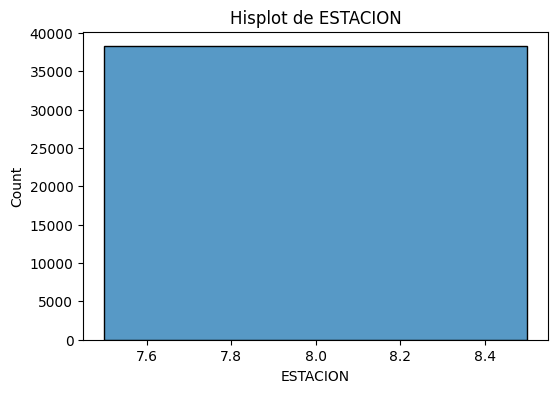

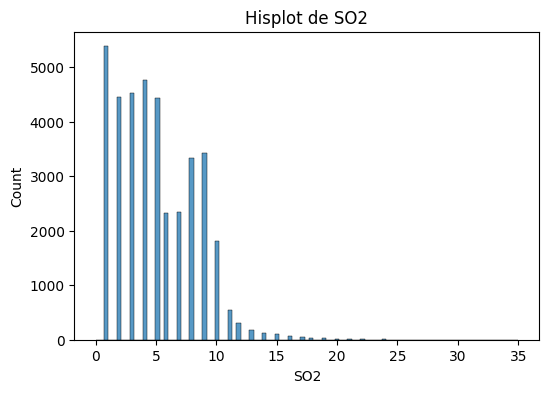

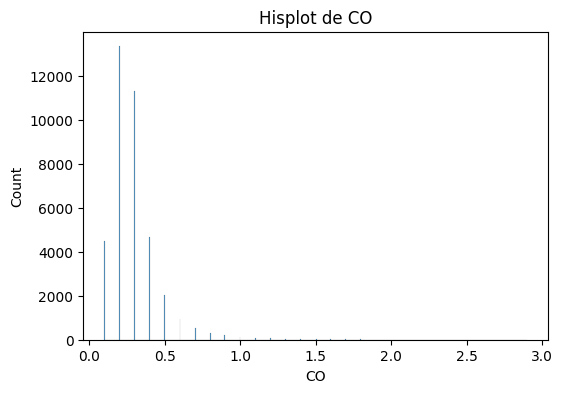

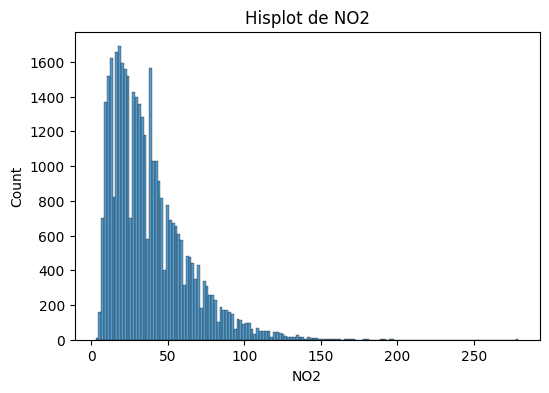

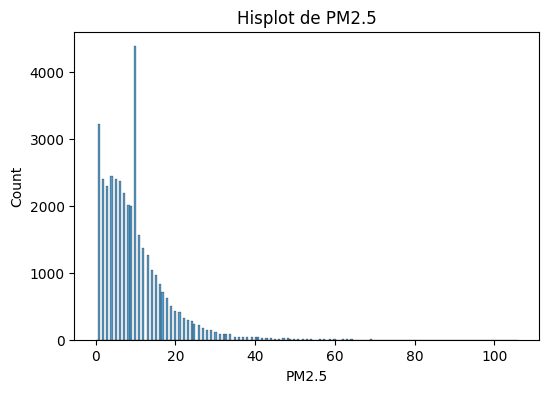

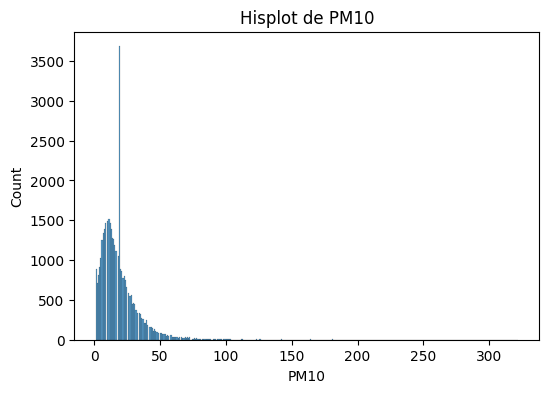

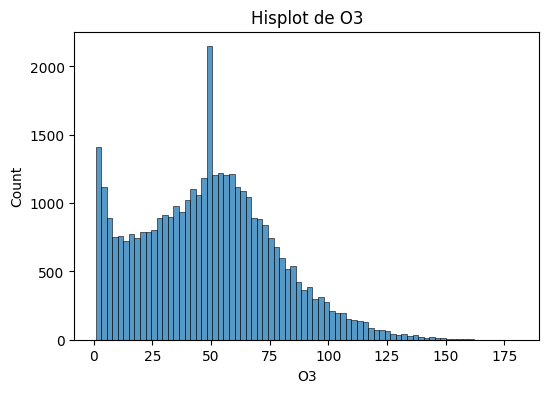

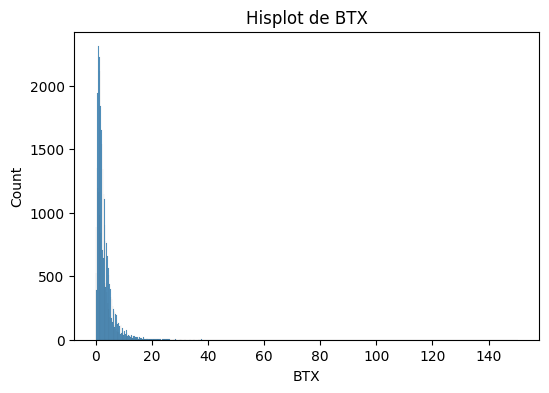

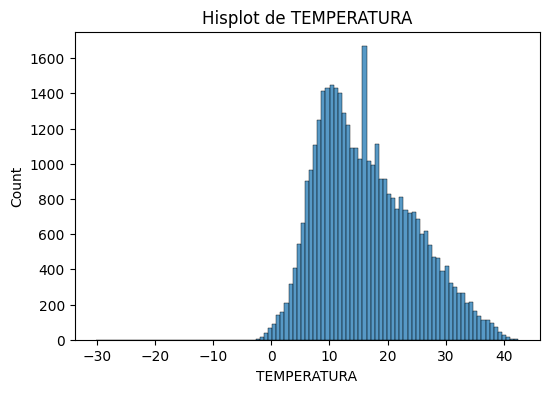

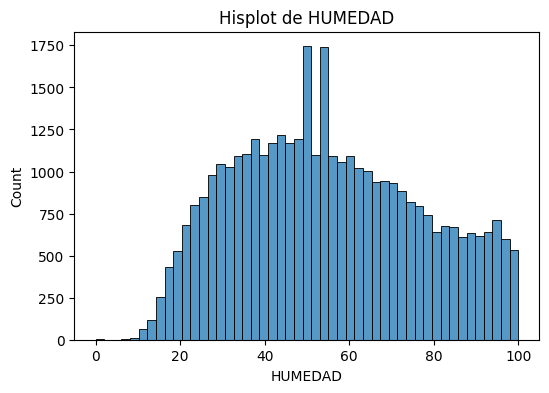

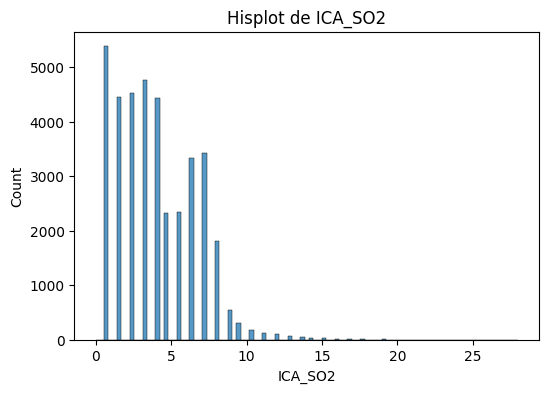

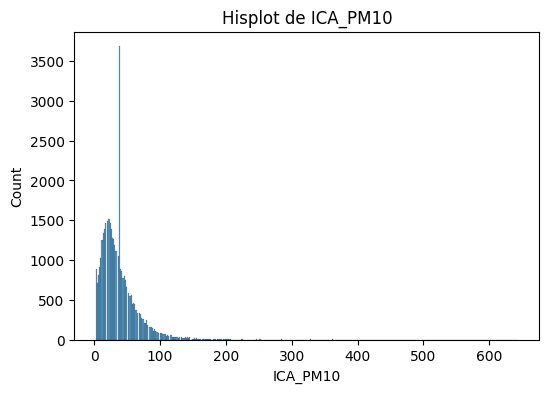

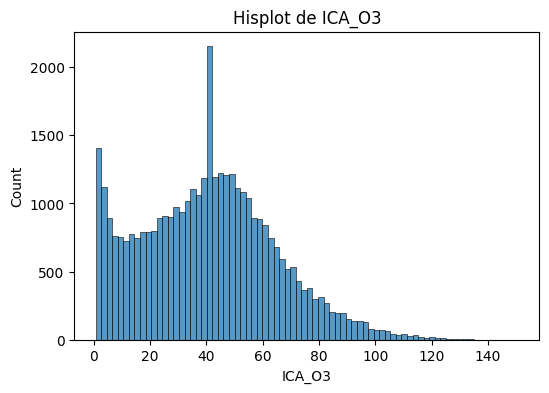

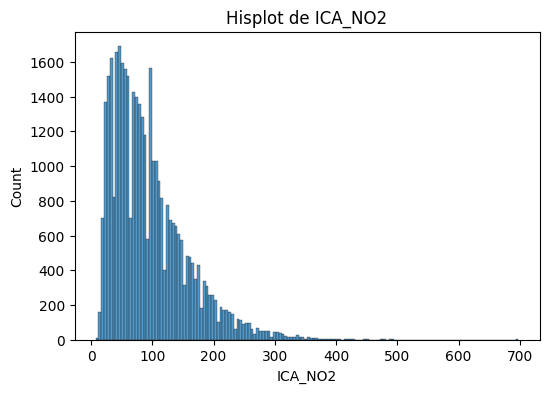

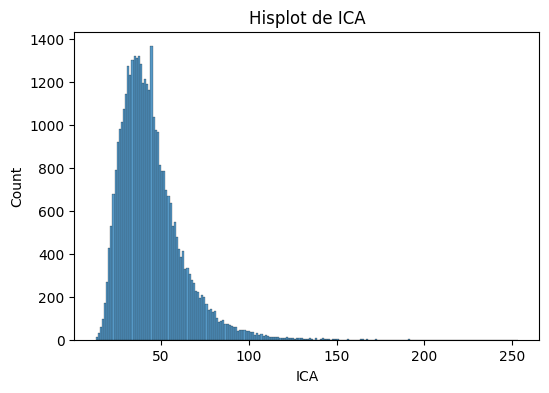

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.to_list()
for column in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=column)
    plt.title(f'Hisplot de {column}')
    plt.show()


In [ ]:
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 -1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
plt.xlim(lower_limit, upper_limit)
plt.show()


In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.to_list()
for column in numeric_columns:
plt.figure(figsize(6,4))
sns.boxplot(data=df, x=column)
plt.title(f'Boxplot de {column}')
plt.show()


In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.to_list()
for column in numeric_columns:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x=column)
plt.title(f'Countplot de {color}')
plt.show()


In [ ]:
df.select_dtypes(include=’object’)

In [ ]:
df.select_dtypes(include='object').columns.to_list()
categorical_columns = df.select_dtypes(include='object').columns.to_list()
for column in categorical_columns:
       pass


In [ ]:
df[‘Category’].nunique()

In [ ]:
categorical_columns = df.select_dtypes(include=’object’).columns.to_list()
for column in categorical_columns:
if df[column].nunique() < 10:
plt.figure(figsize = (5, 6))
sns.countplot(data=df, x=column)
plt.title(‘Countplot de’ + column)
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.select_dtypes(include=’datetime64’)

In [ ]:
df.select_dtypes(include=’datetime64’).columns.to_list()

In [ ]:
date_columns = df.select_dtypes(include=’daytime64’).columns.to_list()

In [ ]:
date_columns = df.select_dtypes(include_’object’).columns.to_list()
for column in date_columns:
plt.figure(figsize = (14, 7))
sns.lineplot(data=df, x=column, y=’Estacion’)
plt.title(‘Calidad aire por’ + column)
plt.show()
